In [1]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [2]:
def plotDecisionBoundary(X, Y, W):
    plt.scatter(X[:,0],X[:,1], c = Y)
    axes = plt.gca()
    xVals = np.array([min(X[:,0]) - 1, max(X[:,0])  + 1])
    if W[1,0] == 0:
        yVals = axes.get_ylim()
        xVals = -(W[2,0]/W[0,0])
    else:    
        yVals = -(W[2,0]/W[1,0])  -(W[0,0]/W[1,0]) * xVals
    plt.plot(xVals, yVals, '--')
    plt.show()

In [24]:
def perceptron(X, Y, alpha):
    count = 0
    for i in range(Y.shape[0]):
        if Y[i] == 0:
            Y[i] = -1
    Xnew = np.ones((X.shape[0], X.shape[1] + 1))
    Xnew[:, :-1] = X
    W = np.random.rand(Xnew.shape[1], 1)
    O = Xnew.dot(W)        
    flag = 1
    while flag == 1:
        count +=1
        print("Iteration Number =",count)
        plotDecisionBoundary(X, Y, W)
        O = Xnew.dot(W)
        for i in range(O.shape[0]):            
            if O[i, 0] > 0:
                O[i, 0] = 1
            else:    
                O[i, 0] = -1
        flag = 0
        for i in range(O.shape[0]):
            if(O[i, 0] != Y[i]):
                flag = 1
                W = W - alpha * O[i, 0] * np.reshape(Xnew[i], (3, 1)) 
        if flag == 0: 
            break  
        if(count == 20):
            break
        
    O = np.reshape(O, O.shape[0])
    print(W)
    return O
            

Creating the datasets and running the perceptron algo on all of them, for separable datasets the model converges really fast in less than 20 iterations, but for non linearly separable it keeps on running and i terminate the algo after 20 iterations

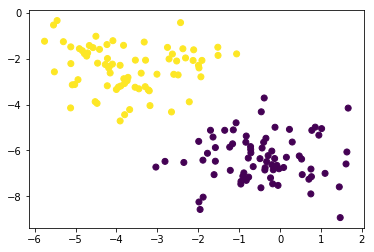

In [4]:
X1, Y1 = make_blobs(n_samples=150, centers=2, n_features=2)
plt.scatter(X1[:,0],X1[:,1], c = Y1)
plt.show()

Iteration Number = 1


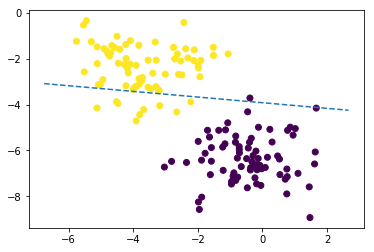

Iteration Number = 2


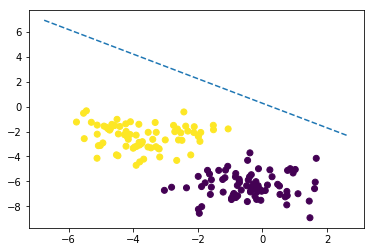

Iteration Number = 3


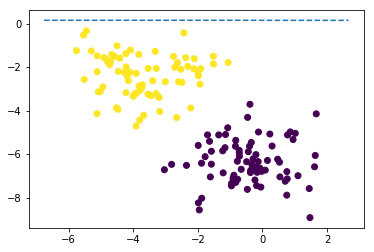

Iteration Number = 4


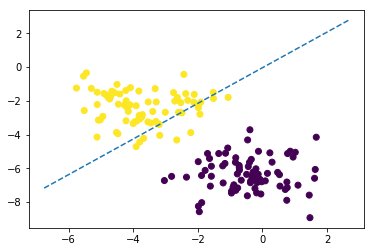

Iteration Number = 5


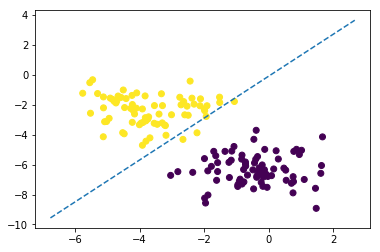

Iteration Number = 6


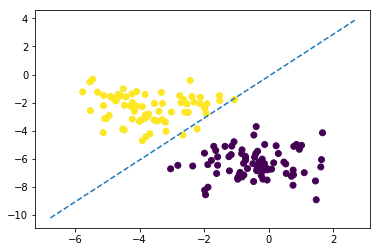

Iteration Number = 7


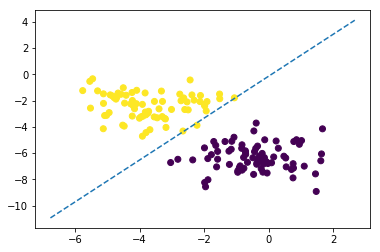

Iteration Number = 8


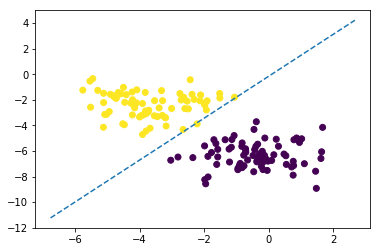

Iteration Number = 9


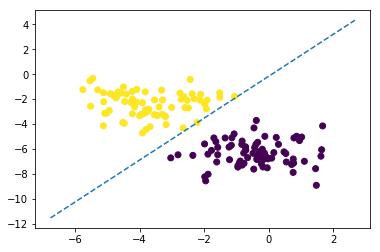

[[-326.00241131]
 [ 193.47368688]
 [  29.99082957]]


In [25]:
O1 = perceptron(X1, Y1, 1)

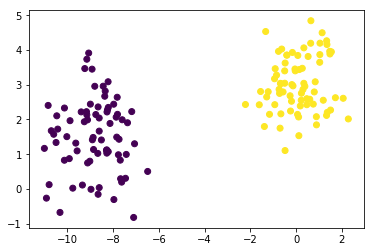

In [42]:
X2, Y2 = make_blobs(n_samples=150, centers=2, n_features=2)
plt.scatter(X2[:,0],X2[:,1], c = Y2)
plt.show()

Iteration Number = 1


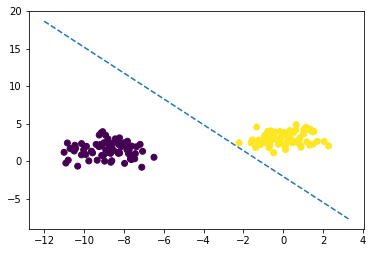

[[0.61895365]
 [0.35920555]
 [0.74012272]]


In [44]:
O2 = perceptron(X2, Y2, 1)

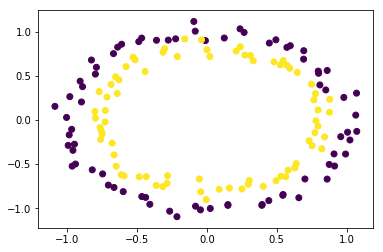

In [8]:
X3, Y3 = make_circles(n_samples=150, noise=0.05)
plt.scatter(X3[:,0],X3[:,1], c = Y3)
plt.show()

Iteration Number = 1


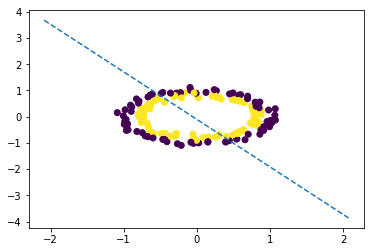

Iteration Number = 2


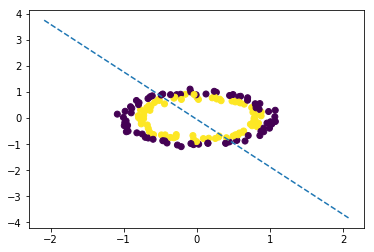

Iteration Number = 3


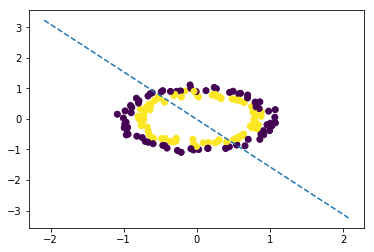

Iteration Number = 4


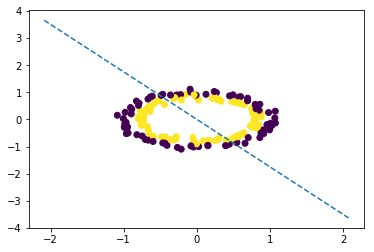

Iteration Number = 5


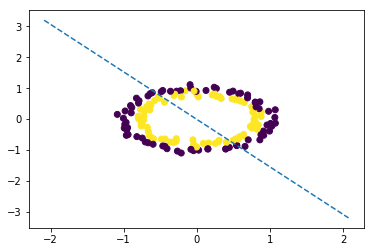

Iteration Number = 6


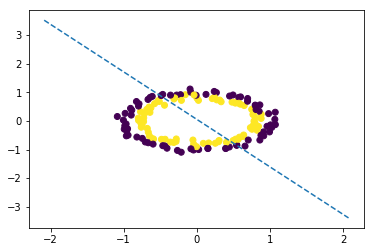

Iteration Number = 7


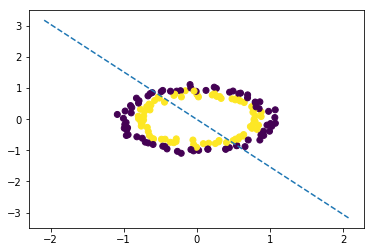

Iteration Number = 8


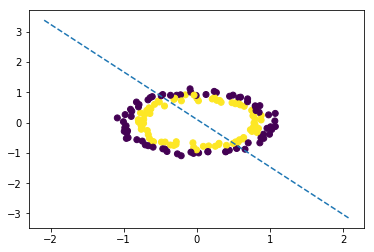

Iteration Number = 9


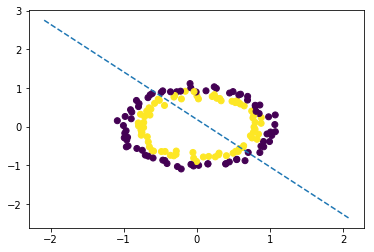

Iteration Number = 10


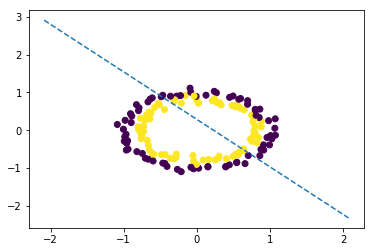

Iteration Number = 11


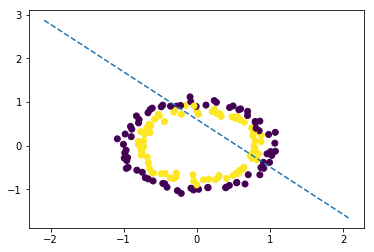

Iteration Number = 12


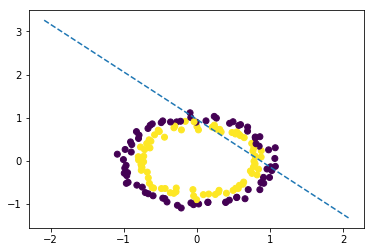

Iteration Number = 13


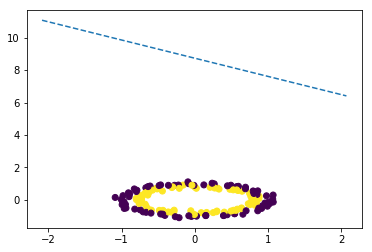

Iteration Number = 14


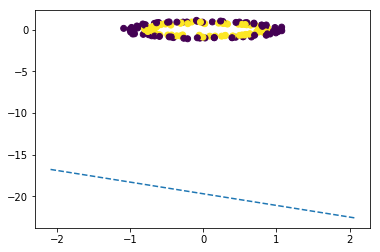

Iteration Number = 15


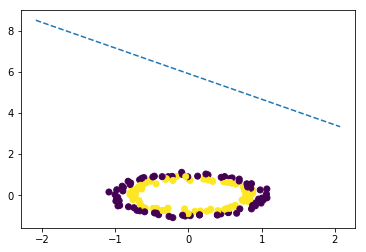

Iteration Number = 16


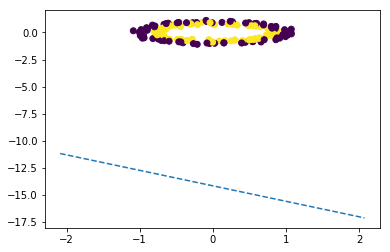

Iteration Number = 17


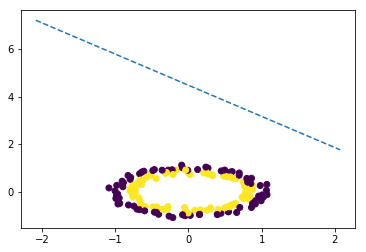

Iteration Number = 18


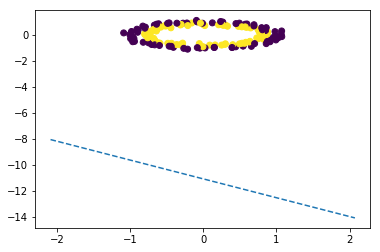

Iteration Number = 19


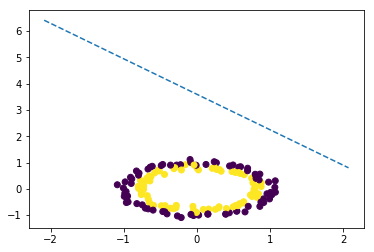

Iteration Number = 20


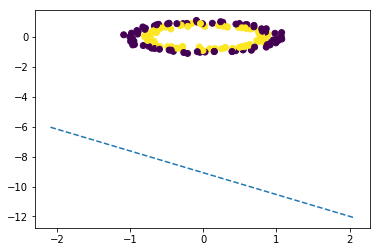

[[  9.14109778]
 [  6.64372634]
 [-19.97991879]]


In [27]:
O3 = perceptron(X3, Y3, 1)

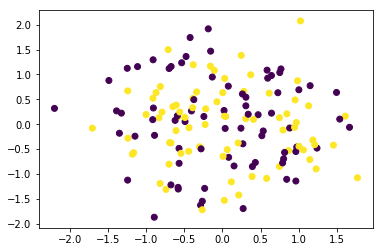

In [10]:
X4, Y4 = make_circles(n_samples=150, noise=0.5)
plt.scatter(X4[:,0],X4[:,1], c = Y4)
plt.show()

Iteration Number = 1


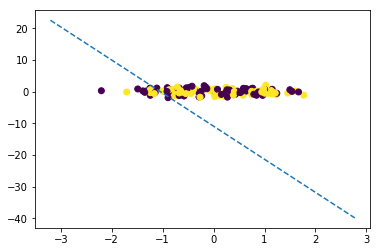

Iteration Number = 2


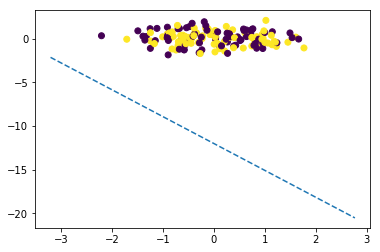

Iteration Number = 3


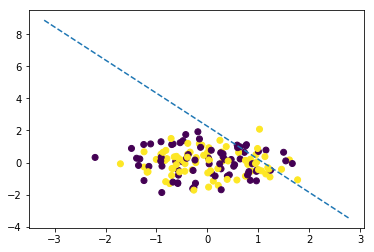

Iteration Number = 4


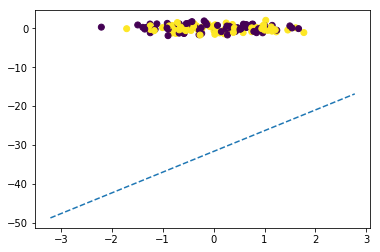

Iteration Number = 5


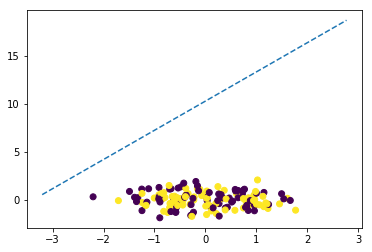

Iteration Number = 6


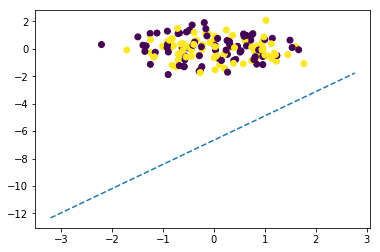

Iteration Number = 7


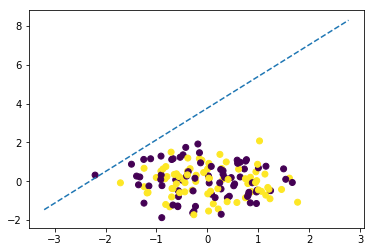

Iteration Number = 8


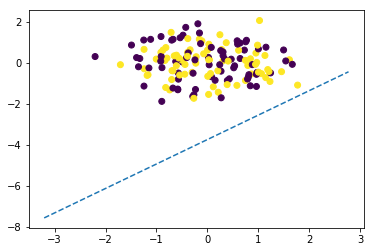

Iteration Number = 9


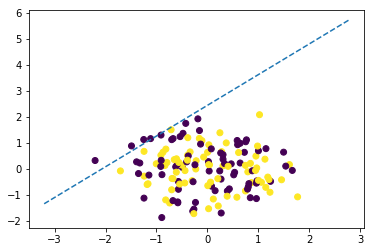

Iteration Number = 10


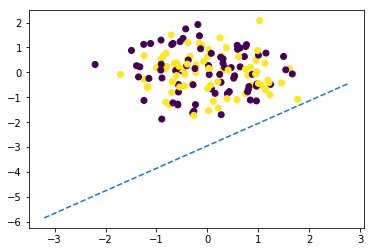

Iteration Number = 11


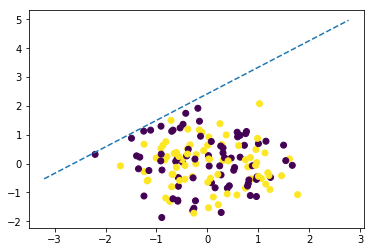

Iteration Number = 12


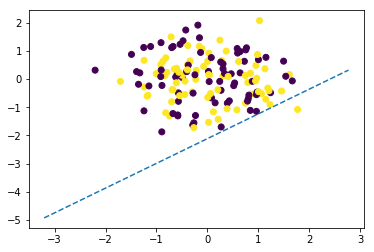

Iteration Number = 13


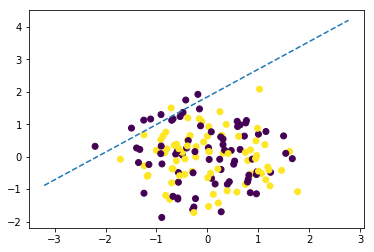

Iteration Number = 14


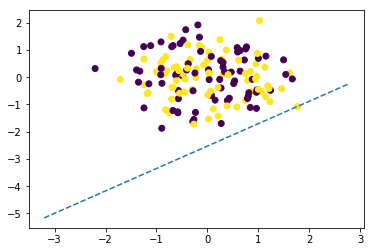

Iteration Number = 15


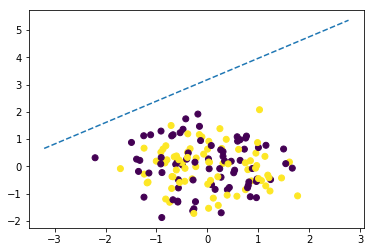

Iteration Number = 16


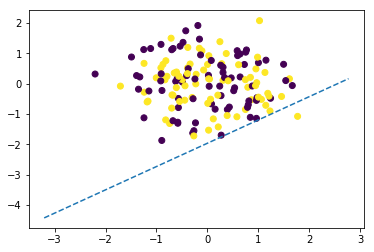

Iteration Number = 17


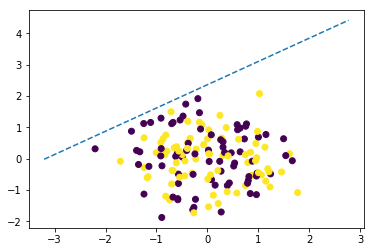

Iteration Number = 18


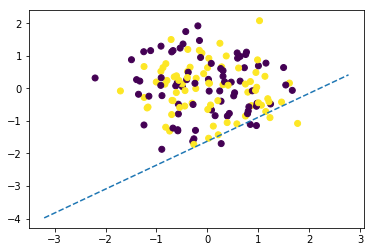

Iteration Number = 19


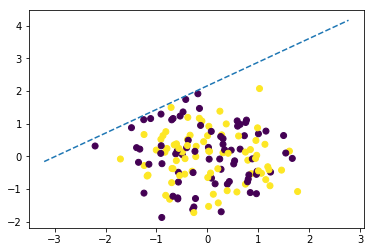

Iteration Number = 20


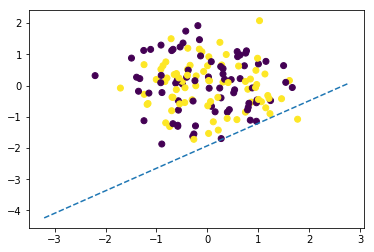

In [11]:
O4 = perceptron(X4, Y4, 1)

The decision boundarys are dependent on the initial weights and it is different in each case. For the linearly separable datasetes the number of iterations before convergence changes and the location of the final boundary changes as we are trying to just find a boundary which separates the 2 classes. For non linearly separable datasets it keeps oscillating for perceptron and random boundary is produced but for svm a centralised boundary is there. 

Weight config 0
Iteration Number = 1


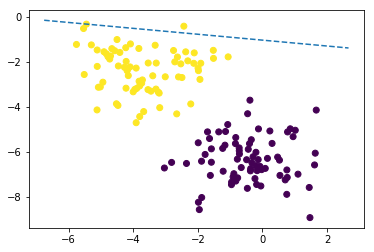

Iteration Number = 2


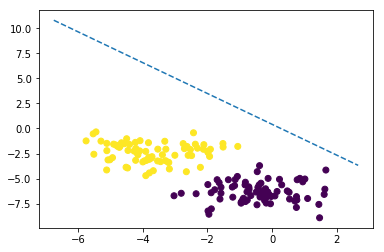

Iteration Number = 3


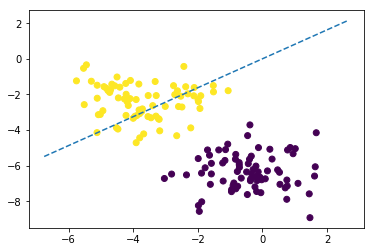

Iteration Number = 4


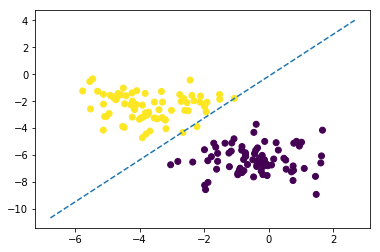

Iteration Number = 5


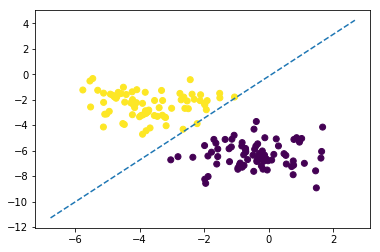

Iteration Number = 6


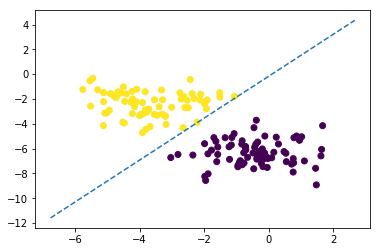

[[-332.75286335]
 [ 196.90372677]
 [  31.88906811]]
Weight config 1
Iteration Number = 1


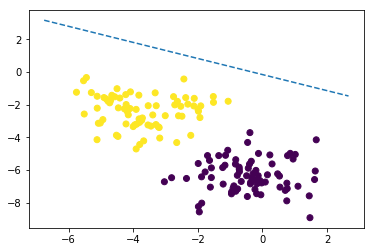

Iteration Number = 2


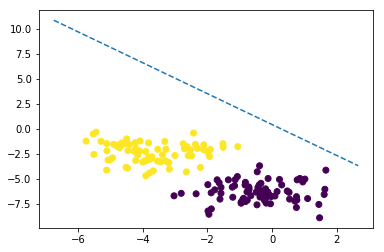

Iteration Number = 3


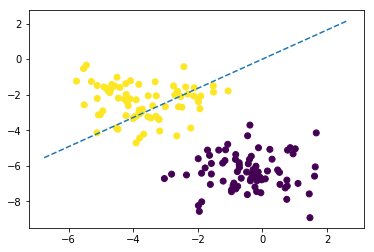

Iteration Number = 4


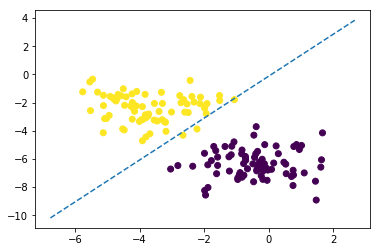

Iteration Number = 5


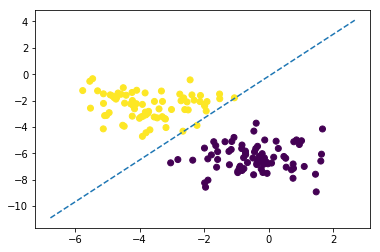

Iteration Number = 6


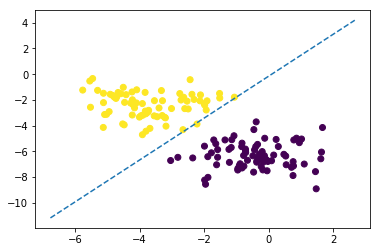

Iteration Number = 7


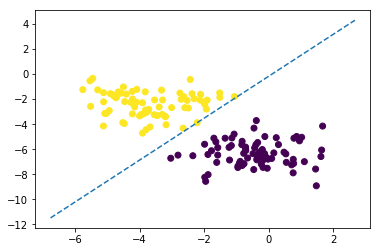

[[-330.35888738]
 [ 197.13792035]
 [  32.11860219]]
Weight config 2
Iteration Number = 1


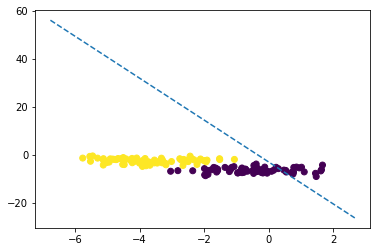

Iteration Number = 2


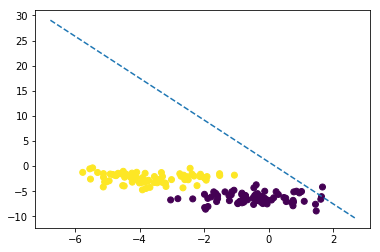

Iteration Number = 3


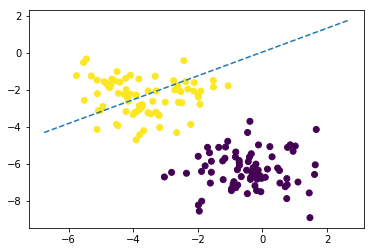

Iteration Number = 4


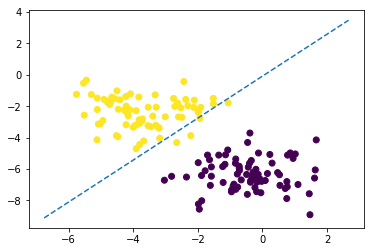

Iteration Number = 5


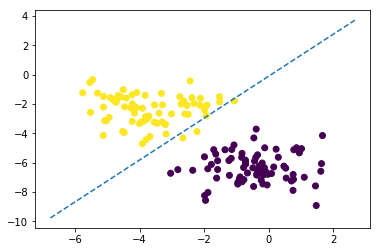

Iteration Number = 6


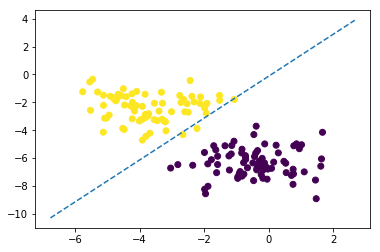

Iteration Number = 7


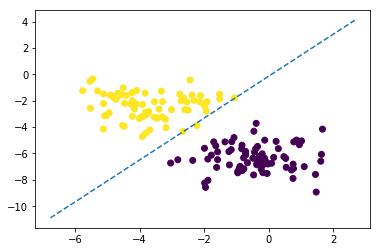

Iteration Number = 8


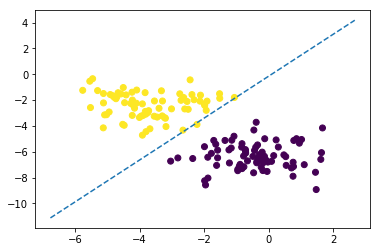

Iteration Number = 9


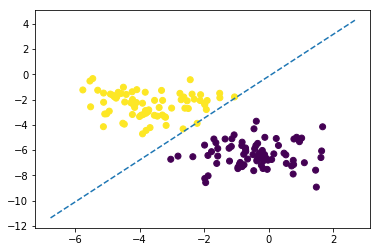

Iteration Number = 10


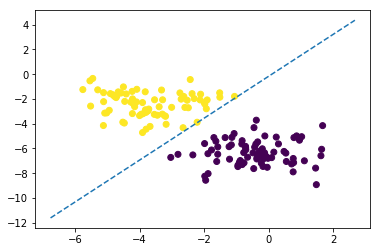

[[-406.96636709]
 [ 240.10358121]
 [  37.23275723]]


In [28]:
for i in range(3):
    print("Weight config", i )
    O1 = perceptron(X1, Y1, 1)

Weight config 0
Iteration Number = 1


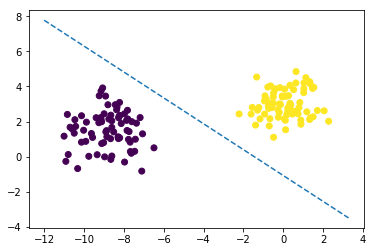

[[0.25672521]
 [0.3485309 ]
 [0.37444652]]
Weight config 1
Iteration Number = 1


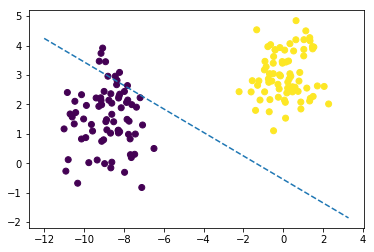

Iteration Number = 2


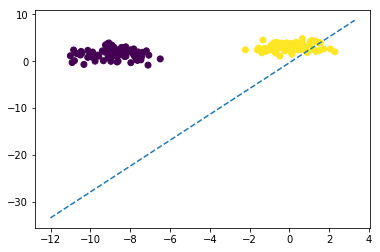

Iteration Number = 3


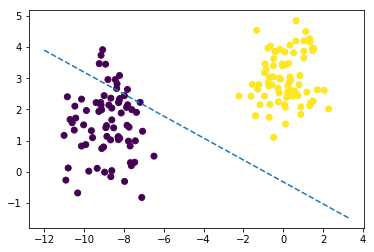

Iteration Number = 4


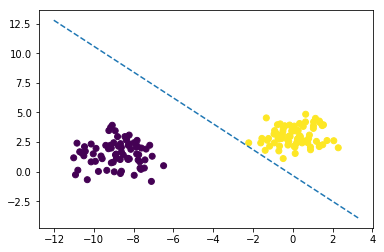

[[155.77405042]
 [142.7502626 ]
 [ 46.48644879]]
Weight config 2
Iteration Number = 1


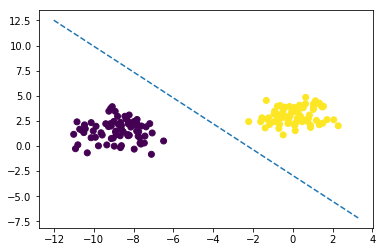

[[0.35748779]
 [0.27793828]
 [0.81504288]]


In [45]:
for i in range(3):
    print("Weight config", i )
    O2 = perceptron(X2, Y2, 1)

Weight config 0
Iteration Number = 1


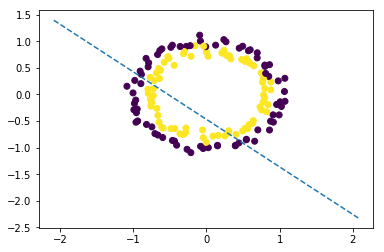

Iteration Number = 2


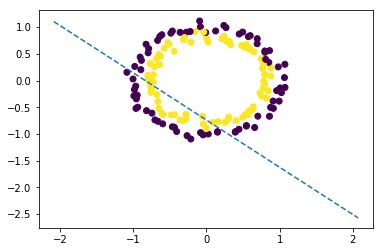

Iteration Number = 3


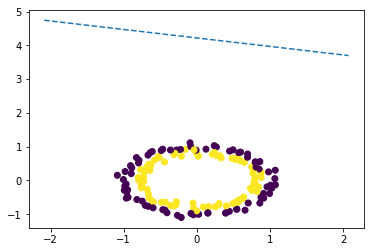

Iteration Number = 4


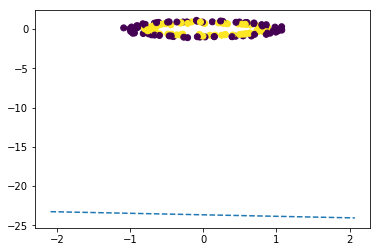

Iteration Number = 5


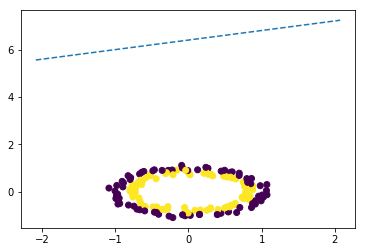

Iteration Number = 6


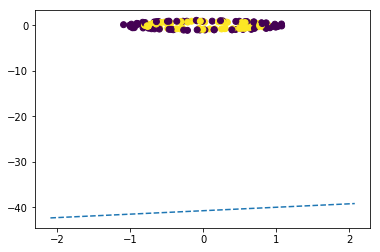

Iteration Number = 7


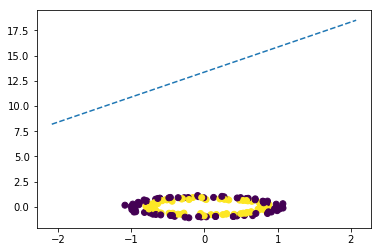

Iteration Number = 8


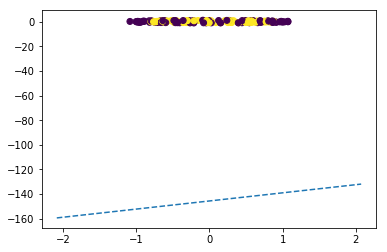

Iteration Number = 9


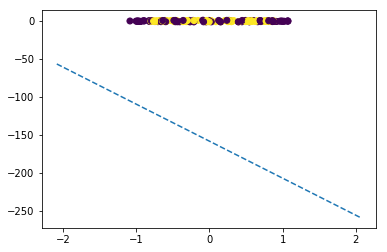

Iteration Number = 10


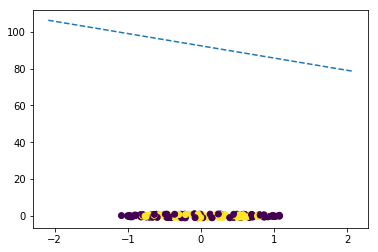

Iteration Number = 11


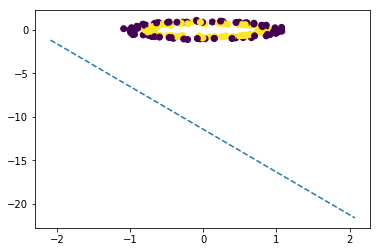

Iteration Number = 12


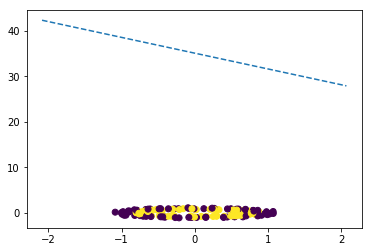

Iteration Number = 13


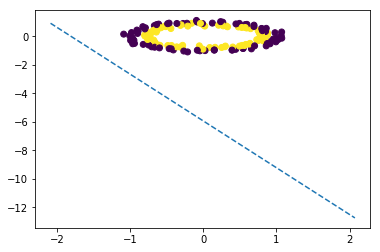

Iteration Number = 14


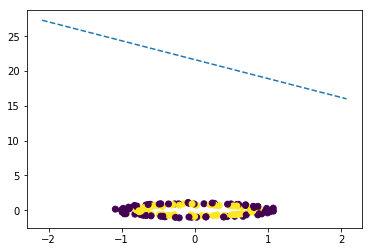

Iteration Number = 15


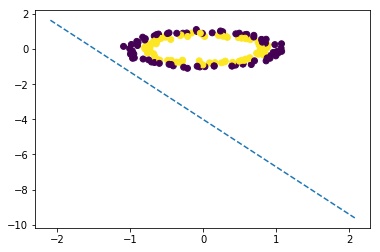

Iteration Number = 16


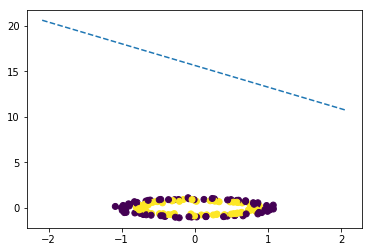

Iteration Number = 17


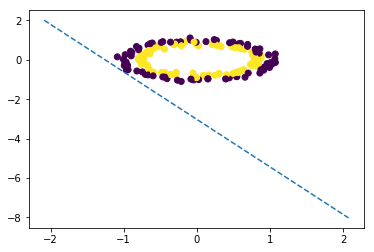

Iteration Number = 18


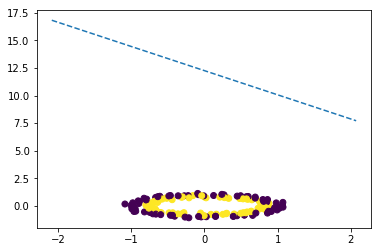

Iteration Number = 19


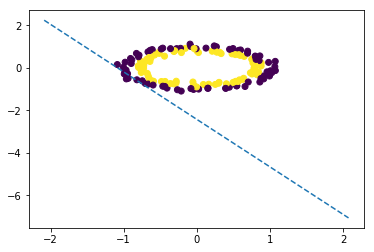

Iteration Number = 20


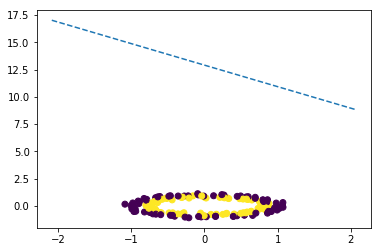

[[10.14715574]
 [ 4.96734294]
 [17.42282841]]
Weight config 1
Iteration Number = 1


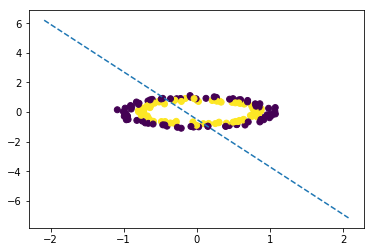

Iteration Number = 2


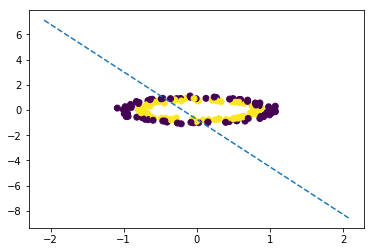

Iteration Number = 3


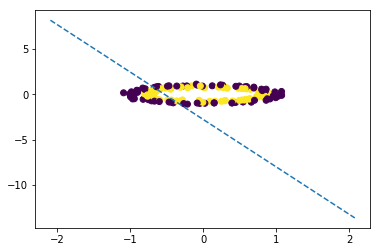

Iteration Number = 4


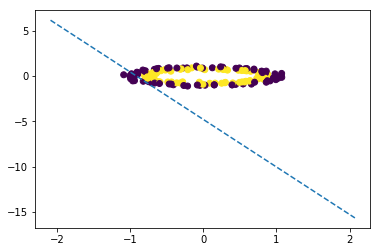

Iteration Number = 5


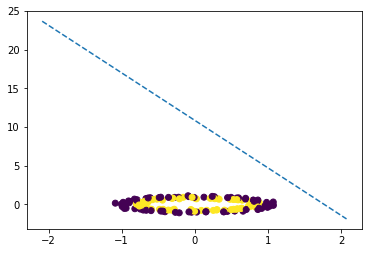

Iteration Number = 6


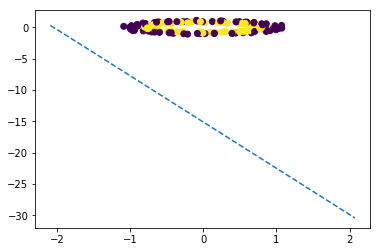

Iteration Number = 7


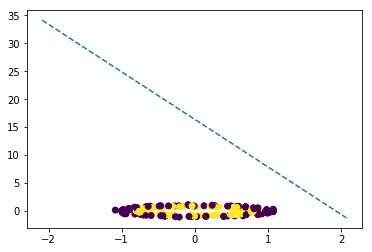

Iteration Number = 8


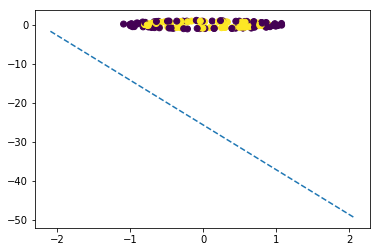

Iteration Number = 9


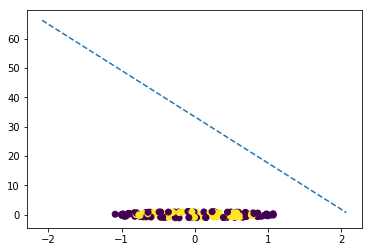

Iteration Number = 10


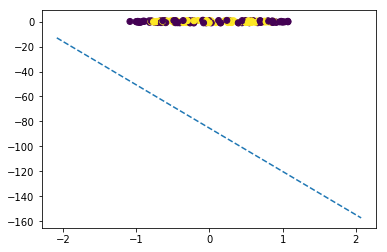

Iteration Number = 11


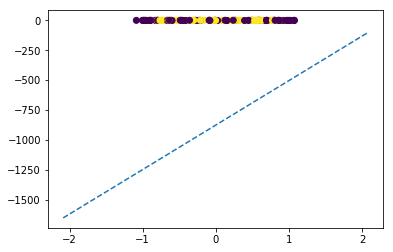

Iteration Number = 12


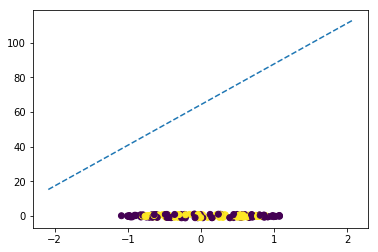

Iteration Number = 13


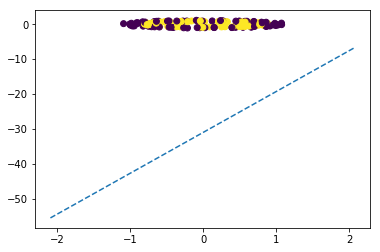

Iteration Number = 14


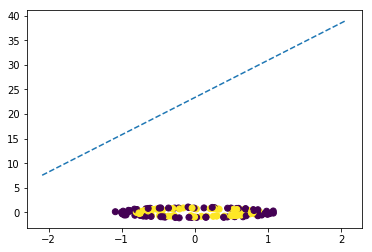

Iteration Number = 15


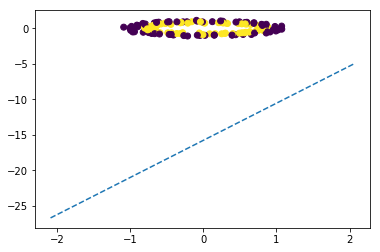

Iteration Number = 16


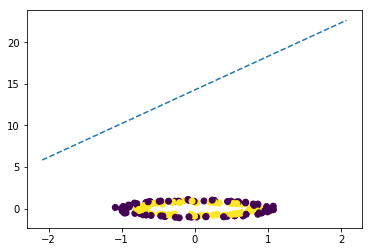

Iteration Number = 17


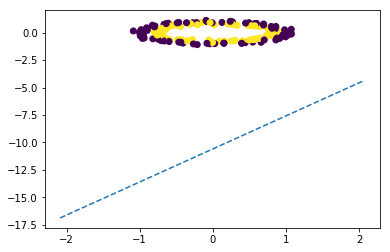

Iteration Number = 18


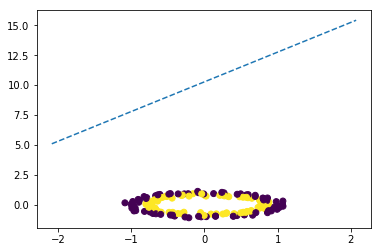

Iteration Number = 19


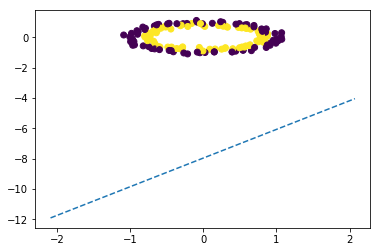

Iteration Number = 20


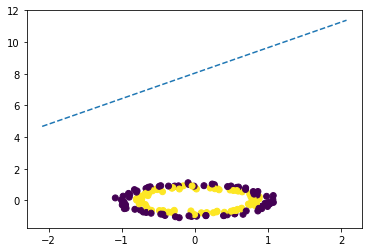

[[-6.67125007]
 [ 5.48573407]
 [35.03326502]]
Weight config 2
Iteration Number = 1


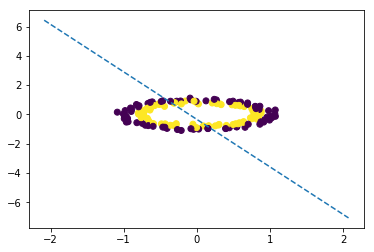

Iteration Number = 2


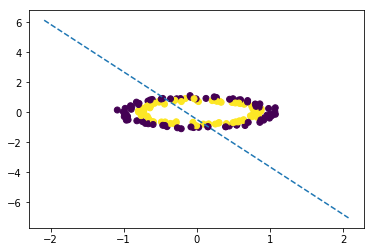

Iteration Number = 3


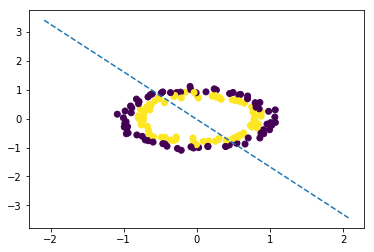

Iteration Number = 4


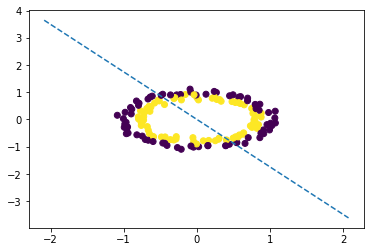

Iteration Number = 5


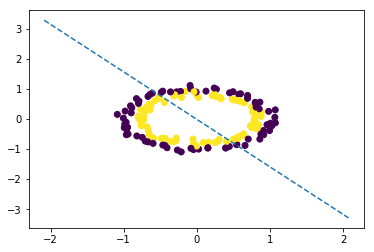

Iteration Number = 6


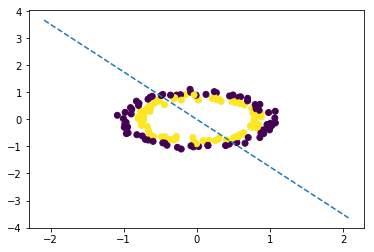

Iteration Number = 7


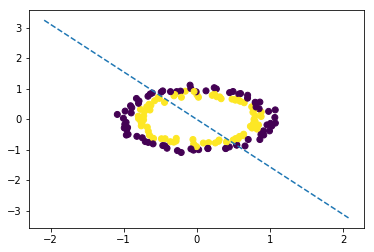

Iteration Number = 8


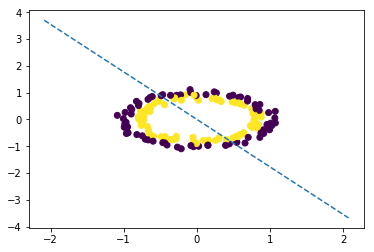

Iteration Number = 9


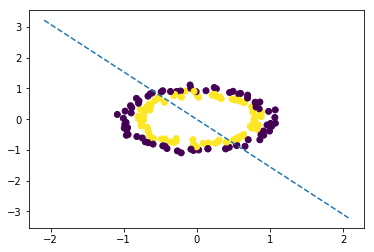

Iteration Number = 10


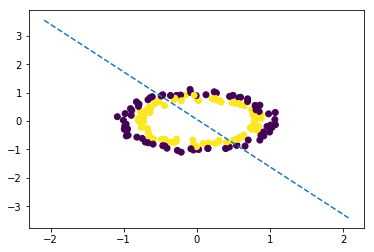

Iteration Number = 11


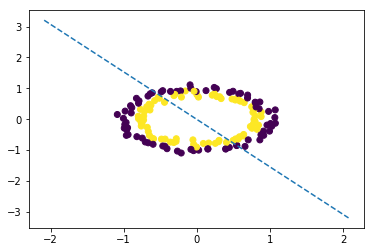

Iteration Number = 12


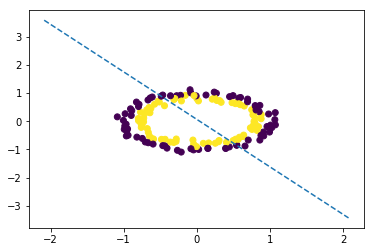

Iteration Number = 13


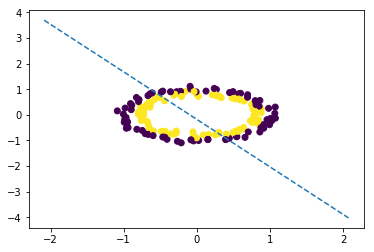

Iteration Number = 14


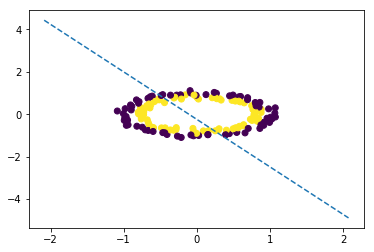

Iteration Number = 15


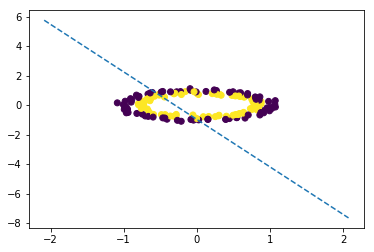

Iteration Number = 16


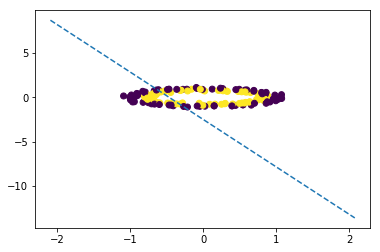

Iteration Number = 17


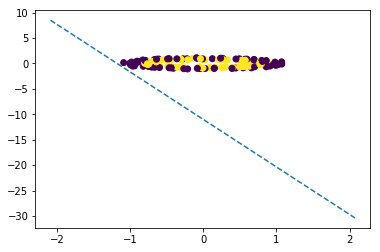

Iteration Number = 18


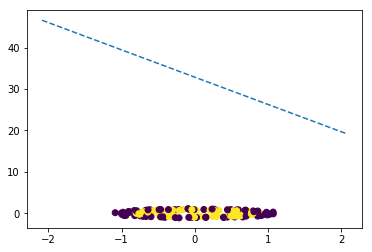

Iteration Number = 19


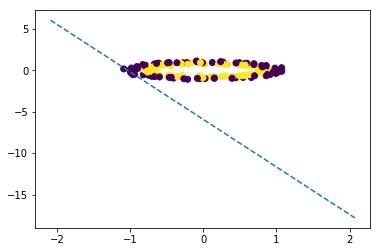

Iteration Number = 20


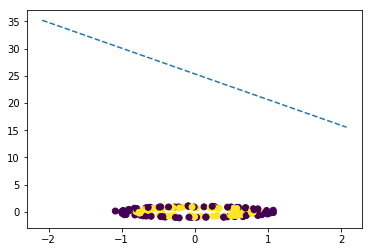

[[12.14713263]
 [ 2.79564079]
 [17.03123922]]


In [30]:
for i in range(3):
    print("Weight config", i )
    O3 = perceptron(X3, Y3, 1)

Weight config 0
Iteration Number = 1


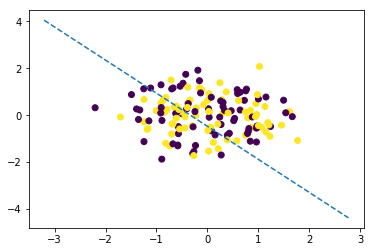

Iteration Number = 2


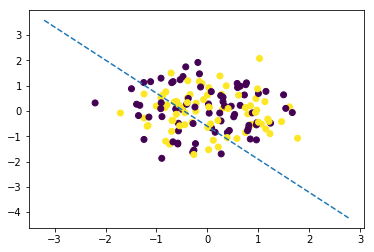

Iteration Number = 3


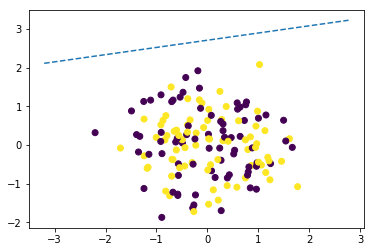

Iteration Number = 4


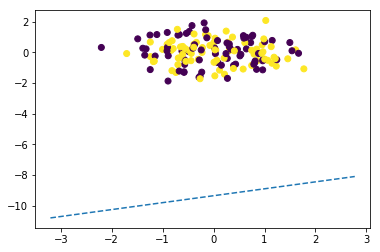

Iteration Number = 5


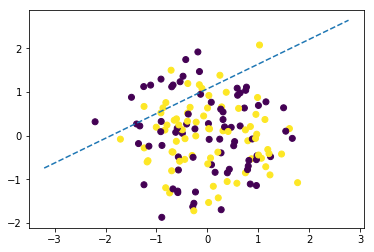

Iteration Number = 6


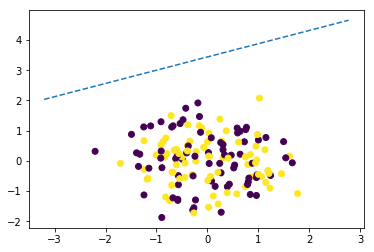

Iteration Number = 7


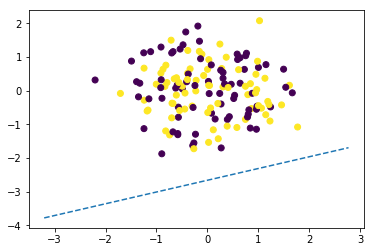

Iteration Number = 8


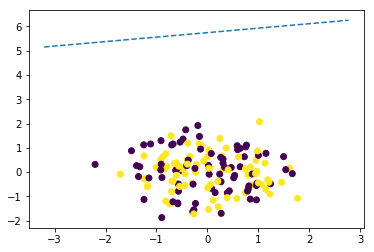

Iteration Number = 9


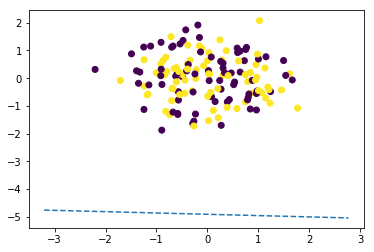

Iteration Number = 10


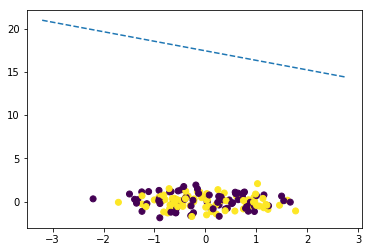

Iteration Number = 11


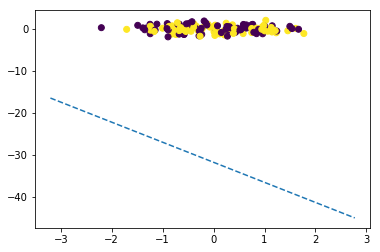

Iteration Number = 12


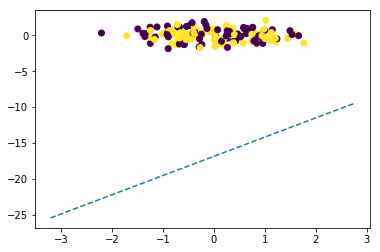

Iteration Number = 13


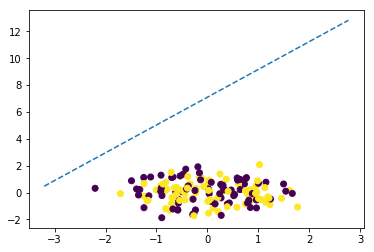

Iteration Number = 14


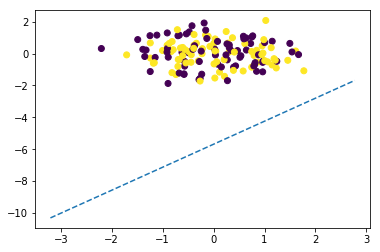

Iteration Number = 15


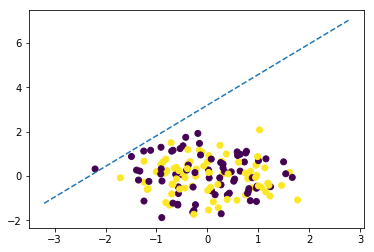

Iteration Number = 16


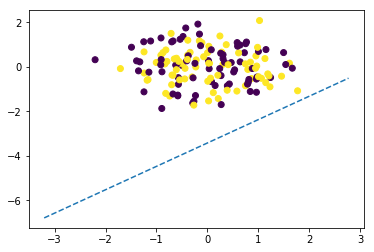

Iteration Number = 17


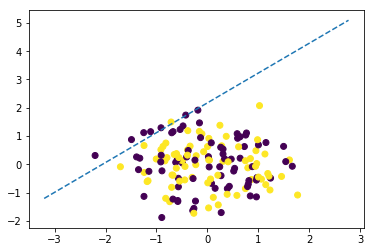

Iteration Number = 18


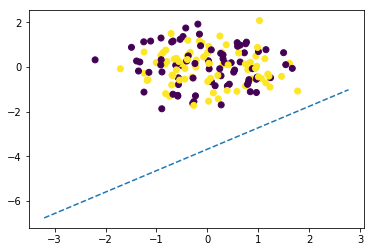

Iteration Number = 19


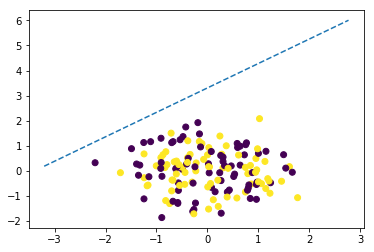

Iteration Number = 20


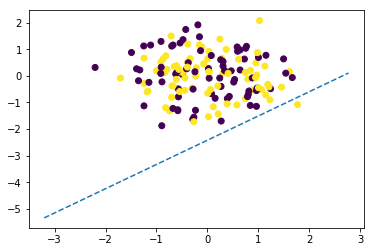

Weight config 1
Iteration Number = 1


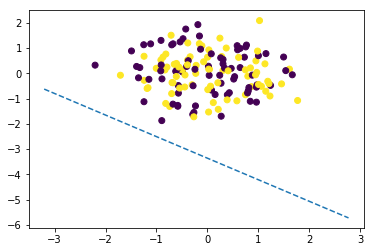

Iteration Number = 2


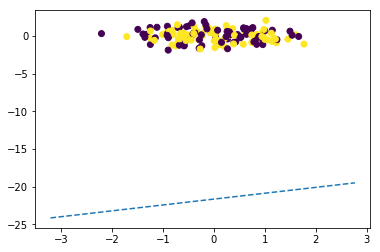

Iteration Number = 3


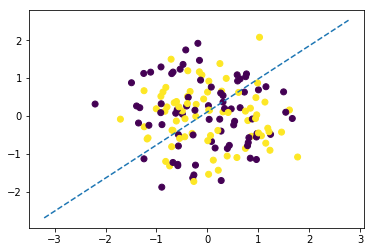

Iteration Number = 4


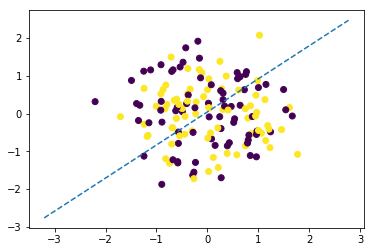

Iteration Number = 5


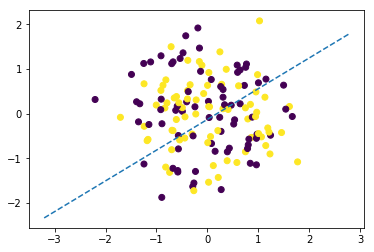

Iteration Number = 6


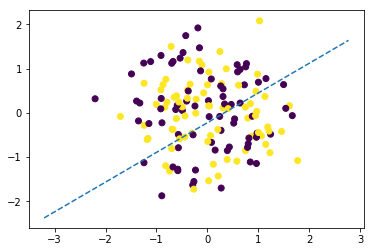

Iteration Number = 7


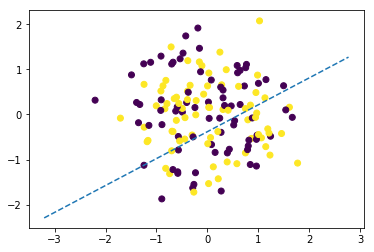

Iteration Number = 8


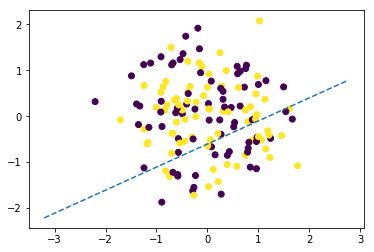

Iteration Number = 9


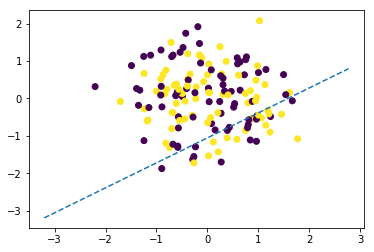

Iteration Number = 10


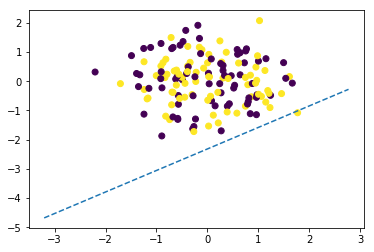

Iteration Number = 11


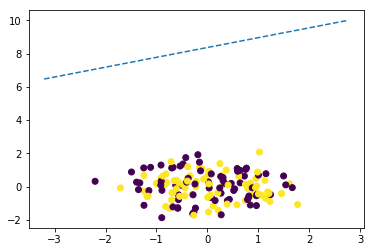

Iteration Number = 12


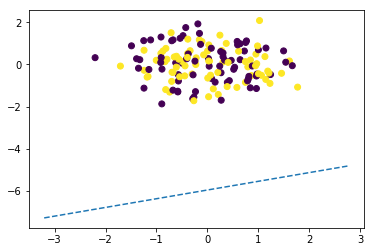

Iteration Number = 13


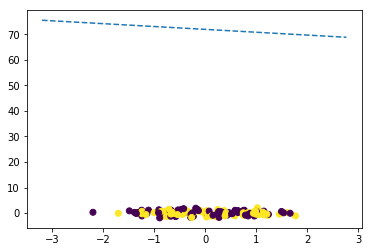

Iteration Number = 14


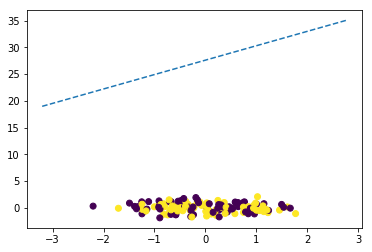

Iteration Number = 15


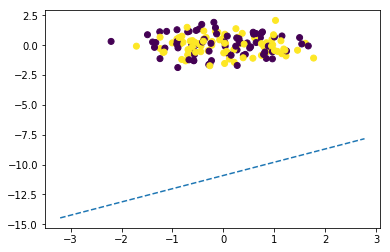

Iteration Number = 16


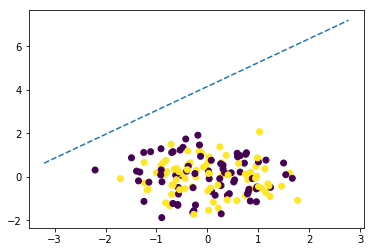

Iteration Number = 17


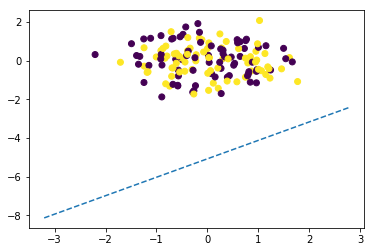

Iteration Number = 18


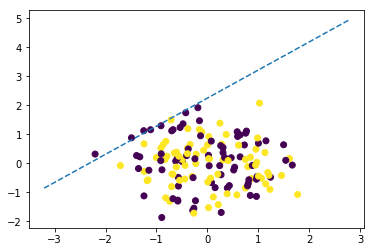

Iteration Number = 19


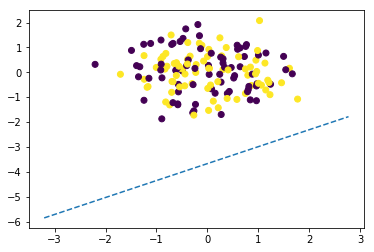

Iteration Number = 20


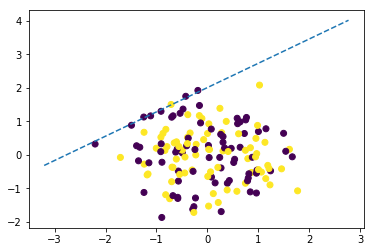

Weight config 2
Iteration Number = 1


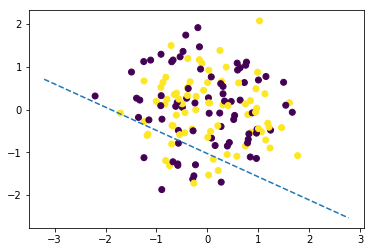

Iteration Number = 2


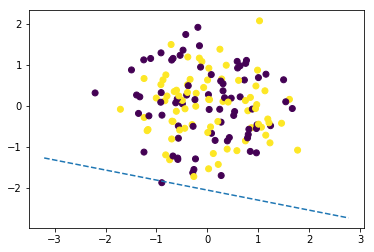

Iteration Number = 3


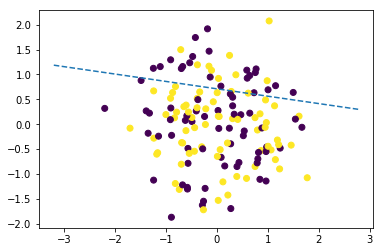

Iteration Number = 4


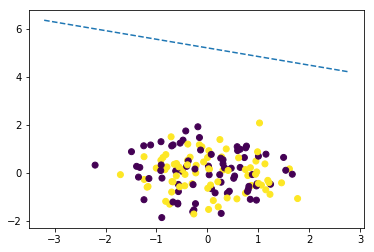

Iteration Number = 5


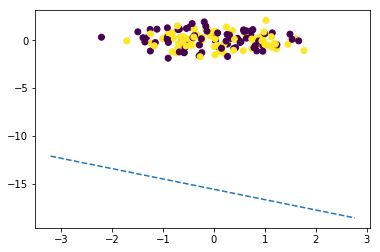

Iteration Number = 6


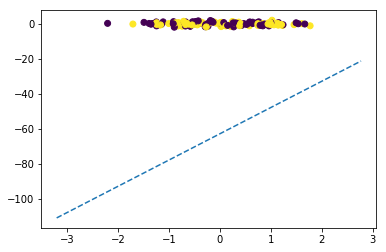

Iteration Number = 7


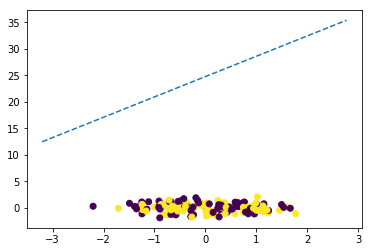

Iteration Number = 8


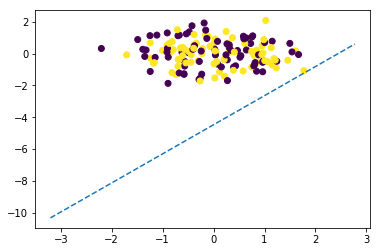

Iteration Number = 9


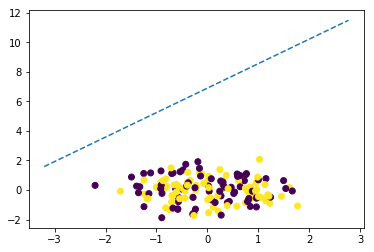

Iteration Number = 10


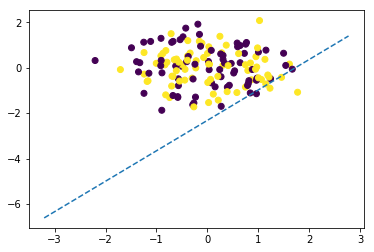

Iteration Number = 11


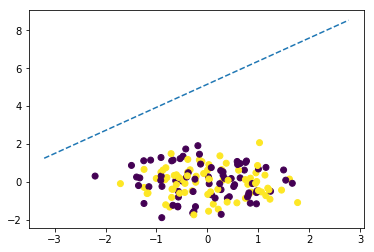

Iteration Number = 12


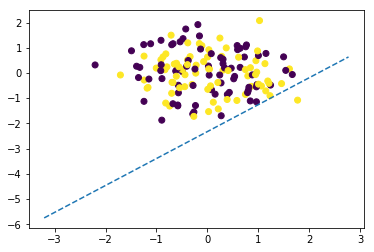

Iteration Number = 13


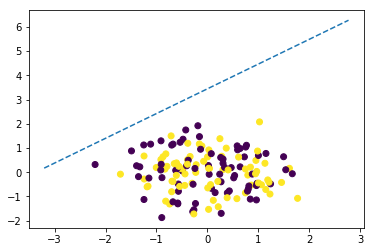

Iteration Number = 14


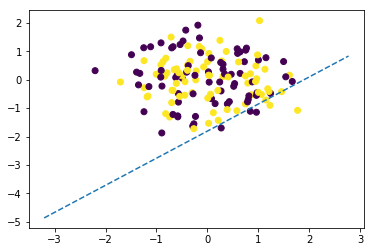

Iteration Number = 15


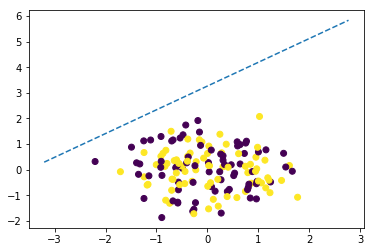

Iteration Number = 16


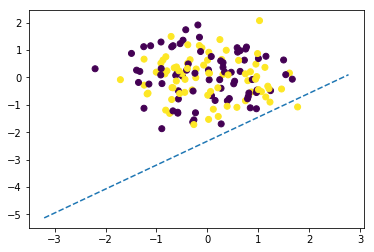

Iteration Number = 17


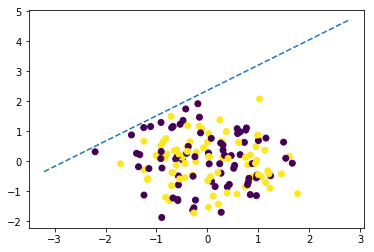

Iteration Number = 18


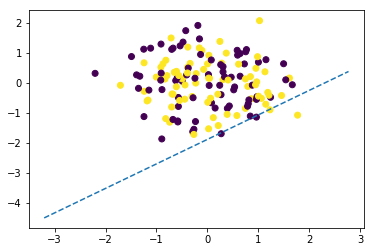

Iteration Number = 19


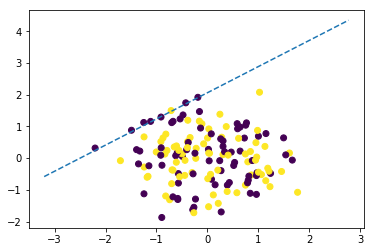

Iteration Number = 20


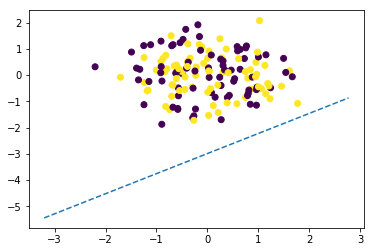

In [15]:
for i in range(3):
    print("Weight config", i )
    O4 = perceptron(X4, Y4, 1)

In case of SVM the decision boundary is in the middle and separates the classes by giving a boundary with maximum margin, in case of perceptron it just gives a boundary that separates the classes and does not care about margins as it stops the moment the 2 classes get separated. SVM gives same boundary everytime but perceptron the boundary is dependent on initial weights. For non linearly separable datasets it keeps oscillating for perceptron and random boundary is produced but for SVM a centralised boundary is there.

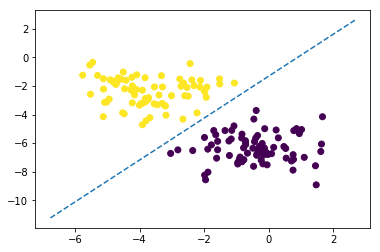

weights [[-1.03802966  0.70658447]] bias [0.92458495]


In [31]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X1, Y1)
plotDecisionBoundary(X1, Y1, np.reshape(np.append(clf.coef_, clf.intercept_),(3, 1)))
print("weights", clf.coef_, "bias", clf.intercept_)

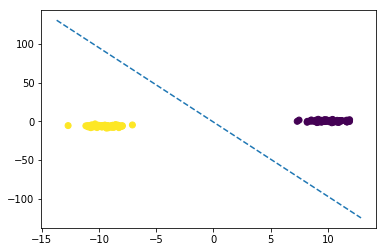

weights [[-0.13357985 -0.01392558]] bias [-0.01270359]


In [32]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X2, Y2)
plotDecisionBoundary(X2, Y2, np.reshape(np.append(clf.coef_, clf.intercept_),(3, 1)))
print("weights", clf.coef_, "bias", clf.intercept_)

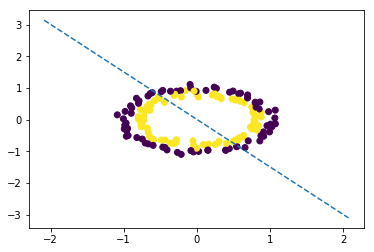

weights [[0.02597368 0.01730297]] bias [-0.00017079]


In [33]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X3, Y3)
plotDecisionBoundary(X3, Y3, np.reshape(np.append(clf.coef_, clf.intercept_),(3, 1)))
print("weights", clf.coef_, "bias", clf.intercept_)

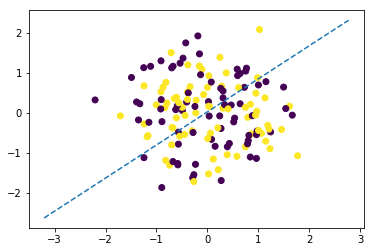

weights [[ 0.04061667 -0.04911621]] bias [0.00086863]


In [34]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X4, Y4)
plotDecisionBoundary(X4, Y4, np.reshape(np.append(clf.coef_, clf.intercept_),(3, 1)))
print("weights", clf.coef_, "bias", clf.intercept_)

In case of logisticRegerssion the boundary is better than perceptron, the boundary is more towards the center as compared to perceptron. It learns from both correct and incorrect answers and maximizes the likelihood whereas perceptron only learns from wrong answers.In logisticRegression the cost function is convex hence we get same decision boundary unlike perceptron. For non linearly separable datasets it keeps oscillating for perceptron and random boundary is produced but for logisticRegression a centralised boundary is there. 

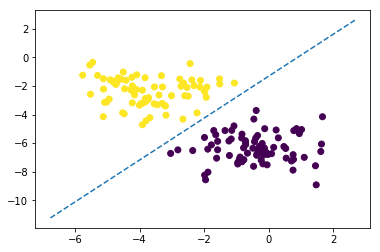

weights [[-1.03802966  0.70658447]] bias [0.92458495]


In [35]:
lf = LogisticRegression(random_state=0)
clf.fit(X1, Y1)
plotDecisionBoundary(X1, Y1, np.reshape(np.append(clf.coef_, clf.intercept_),(3, 1)))
print("weights", clf.coef_, "bias", clf.intercept_)

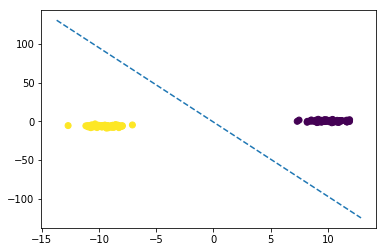

weights [[-0.13357985 -0.01392558]] bias [-0.01270359]


In [36]:
lf = LogisticRegression(random_state=0)
clf.fit(X2, Y2)
plotDecisionBoundary(X2, Y2, np.reshape(np.append(clf.coef_, clf.intercept_),(3, 1)))
print("weights", clf.coef_, "bias", clf.intercept_)

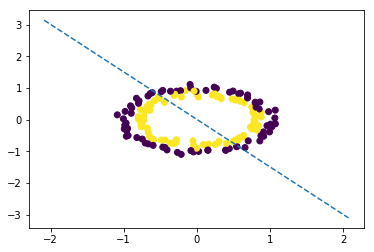

weights [[0.02597368 0.01730297]] bias [-0.00017079]


In [37]:
lf = LogisticRegression(random_state=0)
clf.fit(X3, Y3)
plotDecisionBoundary(X3, Y3, np.reshape(np.append(clf.coef_, clf.intercept_),(3, 1)))
print("weights", clf.coef_, "bias", clf.intercept_)

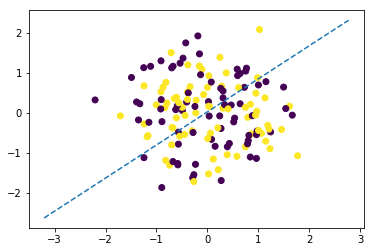

weights [[ 0.04061667 -0.04911621]] bias [0.00086863]


In [38]:
lf = LogisticRegression(random_state=0)
clf.fit(X4, Y4)
plotDecisionBoundary(X4, Y4, np.reshape(np.append(clf.coef_, clf.intercept_),(3, 1)))
print("weights", clf.coef_, "bias", clf.intercept_)